In [23]:
import pandas as pd
import numpy as np 
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [24]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [25]:
df = pd.read_csv('data\heart_desease_data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
df.sample(frac=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1


In [27]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
df = df.select_dtypes(include=[np.number])

In [30]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [31]:
x = df.iloc[:,0:13]
x
y = df.iloc[:,13:14]
y

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227, 1), (76, 1))

In [33]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [34]:
y_train

,target
280,0
235,0
260,0
76,1
275,0
...,...
156,1
123,1
15,1
125,1


In [11]:
# scaler = StandardScaler().fit(x_train)
# x_train_sc = scaler.transform(x_train)
# x_test_sc = scaler.transform(x_test)

In [12]:
# D_train=xgb.DMatrix(data =x_train_sc, label = y_train)
# D_test=xgb.DMatrix(data = x_test_sc)

In [35]:
# x_train_sc.shape

In [36]:
yy = y_train[:,np.newaxis]

InvalidIndexError: (slice(None, None, None), None)

In [ ]:
yy

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [37]:
from xgboost import XGBClassifier

In [38]:
# parametre = {
#     'max_depth':[3,5,7,8],
#     'gamma':[0.1,0.6],
#     'eval_metric':['mlogloss']
# }
# num_class varken hata aldım.
model = xgb.XGBClassifier()


In [39]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
x_train_sc

array([[-1.35069059,  0.73060508, -0.97214221, ..., -0.6356338 ,
        -0.6875383 , -2.07529903],
       [-0.36375895,  0.73060508, -0.97214221, ...,  0.96757589,
        -0.6875383 ,  1.21905677],
       [ 1.28112713, -1.36872851, -0.97214221, ..., -0.6356338 ,
         1.31337444,  1.21905677],
       ...,
       [-0.47341802, -1.36872851,  0.98942474, ..., -0.6356338 ,
        -0.6875383 , -0.42812113],
       [-2.22796317, -1.36872851,  0.00864126, ...,  0.96757589,
        -0.6875383 , -0.42812113],
       [ 1.28112713,  0.73060508, -0.97214221, ...,  0.96757589,
         0.31291807, -0.42812113]])

In [16]:
y_train

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [13]:
best_model = GridSearchCV(estimator = model, param_grid = parametre, cv = 3, n_jobs = -1, verbose = 2)
best_model.fit(x_train_sc,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eval_metric': ['mlogloss'], 'gamma': [0.1, 0.6],
                         'max_depth': [3, 5, 7, 8]},
             verbose=2)

In [14]:
GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=None, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'eval_metric': ['mlogloss'], 'gamma': [0.1, 0.6],
                         'max_depth': [3, 5, 7, 8]},
             verbose=2)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learn...e, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=None, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'eval_metric': ['mlogloss'], 'gamma': [0.1, 0.6],
                         'max_depth': [3, 5, 7, 8]},
             verbose=2)

In [15]:
param = best_model.best_params_
model = xgb.train(params = param, dtrain=D_train)

In [19]:
model.save_model("model_class")
model1 = xgb.XGBClassifier()
model1.load_model('model_class')
best_predict_prob = model1.predict_proba(x_test_sc)
best_predicts = model1.predict(x_test_sc)

c:\Users\lapto\OneDrive\Desktop\zenml\zenenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:13:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [20]:
result = pd.DataFrame(best_predict_prob, columns = ['p1','p2'])
result['Actual']=y_test
result['Predicted']=best_predicts
result

,p1,p2,Actual,Predicted
0,0.880321,0.119679,0,0
1,0.514809,0.485191,0,0
2,0.559371,0.440629,0,0
3,0.223985,0.776015,1,1
4,0.581295,0.418705,0,0
...,...,...,...,...
71,0.536656,0.463344,1,0
72,0.386711,0.613289,1,1
73,0.383352,0.616648,1,1
74,0.924293,0.075707,0,0


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
def report(y_true, y_prediction, n , norm):
    cm=confusion_matrix(y_true, y_prediction, normalize=norm)
    df_cm = pd.DataFrame(cm,  range(0,n),range(0,n))
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.suptitle('Confusion Matrix', x=0.44, y=1.0, ha='center', fontsize=25)
    plt.xlabel('Predict Values', fontsize =25)
    plt.ylabel('Test Values', fontsize =25)
    plt.show()
    print('Classification report :\n ', classification_report(y_true, y_prediction))

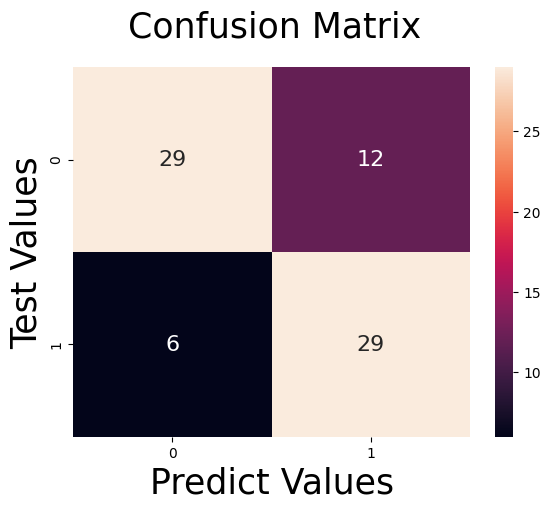

Classification report :
                precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.71      0.83      0.76        35

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.77      0.76      0.76        76



In [23]:
report(y_test,best_predicts,2,None)

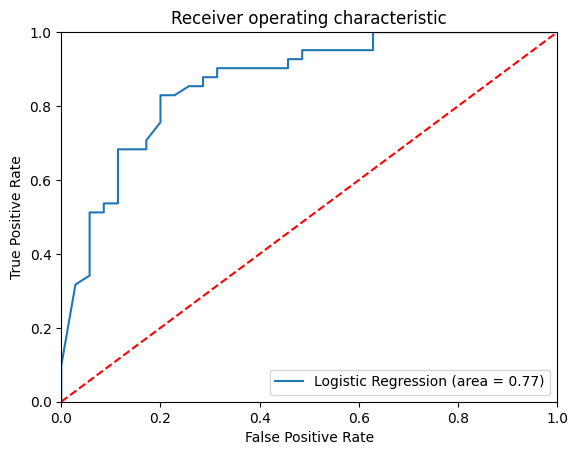

In [24]:
logit_roc_auc = roc_auc_score(y_test, best_predicts)

# Görselleştirmek istersek
fpr, tpr, thresholds = roc_curve(y_test, best_predict_prob[:,0], pos_label = 0)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show();